In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [52]:
df = pd.read_csv("/content/data.csv")

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fund Number        407 non-null    object 
 1   Market Cap         407 non-null    object 
 2   Type               407 non-null    object 
 3   Risk               407 non-null    object 
 4   Assets             407 non-null    float64
 5   Turnover Ratio(%)  407 non-null    float64
 6   SD                 407 non-null    float64
 7   Sharpe Ratio       407 non-null    float64
 8   1YrReturn%         407 non-null    float64
 9   3YrReturn%         407 non-null    float64
 10  5YrReturn%         407 non-null    float64
 11  10YrReturn%        407 non-null    float64
 12  Expense Ratio      407 non-null    float64
 13  Star Rating        407 non-null    object 
dtypes: float64(9), object(5)
memory usage: 44.6+ KB


In [54]:
df.isnull().sum()

,0
Fund Number,0
Market Cap,0
Type,0
Risk,0
Assets,0
Turnover Ratio(%),0
SD,0
Sharpe Ratio,0
1YrReturn%,0
3YrReturn%,0


In [55]:
threeyr = df['3YrReturn%']
df.drop('3YrReturn%', axis=1, inplace=True)
df.drop('Fund Number', axis = 1, inplace=True)
df['3YrReturn%'] =  threeyr

In [56]:
df['Star Rating'].unique()

array(['Four', 'Three', 'Two', 'Five', 'One'], dtype=object)

In [57]:
oe = OrdinalEncoder(categories=[['Small', 'Mid-Cap', 'Large'],['Value','Growth'],['Low','Average', 'High'],['One', 'Two', 'Three','Four','Five']])
df[['Market Cap', 'Type', 'Risk','Star Rating']] = oe.fit_transform(df[['Market Cap', 'Type', 'Risk','Star Rating']])


In [58]:
df.head()

,Market Cap,Type,Risk,Assets,Turnover Ratio(%),SD,Sharpe Ratio,1YrReturn%,5YrReturn%,10YrReturn%,Expense Ratio,Star Rating,3YrReturn%
0,2.0,1.0,1.0,8524.94,112.0,9.51,1.91,11.08,17.00,8.82,0.82,3.0,19.29
1,2.0,0.0,1.0,942.15,26.0,10.41,1.88,11.89,14.60,9.26,0.95,3.0,18.20
2,1.0,1.0,2.0,374.63,63.4,15.24,1.88,-4.34,13.02,12.98,1.35,2.0,12.63
3,1.0,0.0,1.0,1478.08,6.0,9.51,1.86,7.95,15.15,7.40,0.69,1.0,16.48
4,2.0,1.0,1.0,13634.38,5.0,10.93,1.85,11.52,19.59,8.83,1.15,3.0,21.55


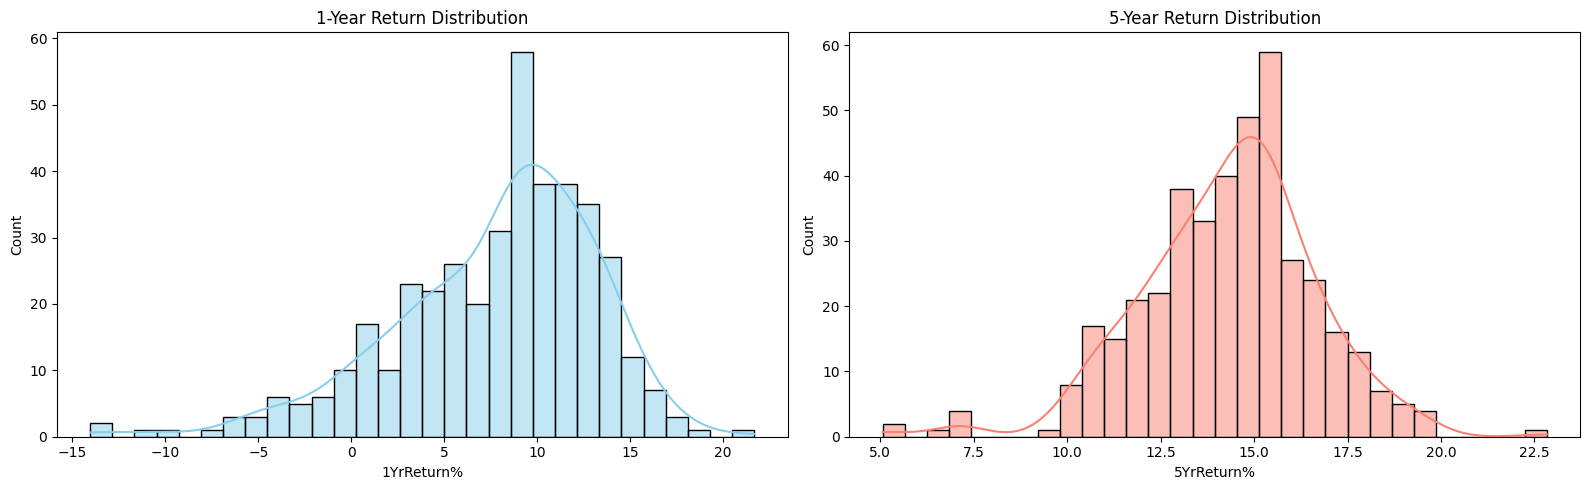

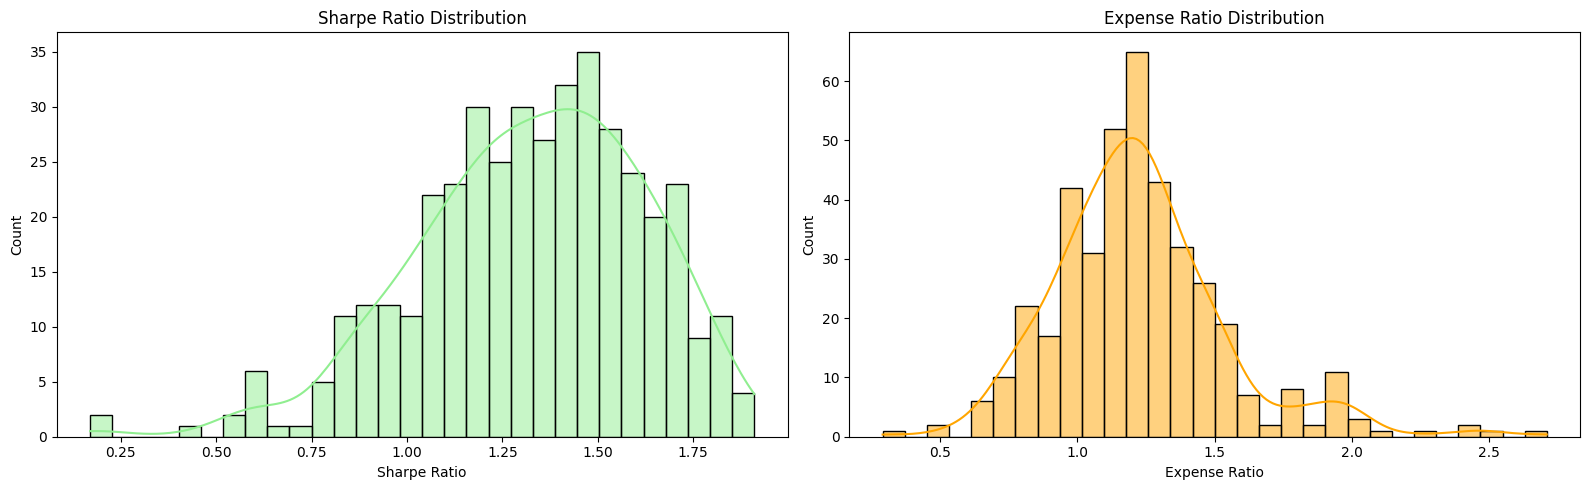

In [59]:
plt.figure(figsize=(16, 5))

# First row
plt.subplot(1, 2, 1)
sns.histplot(df['1YrReturn%'], kde=True, bins=30, color='skyblue')
plt.title('1-Year Return Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['5YrReturn%'], kde=True, bins=30, color='salmon')
plt.title('5-Year Return Distribution')

plt.tight_layout()
plt.show()

# Second row
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Sharpe Ratio'], kde=True, bins=30, color='lightgreen')
plt.title('Sharpe Ratio Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['Expense Ratio'], kde=True, bins=30, color='orange')
plt.title('Expense Ratio Distribution')

plt.tight_layout()
plt.show()


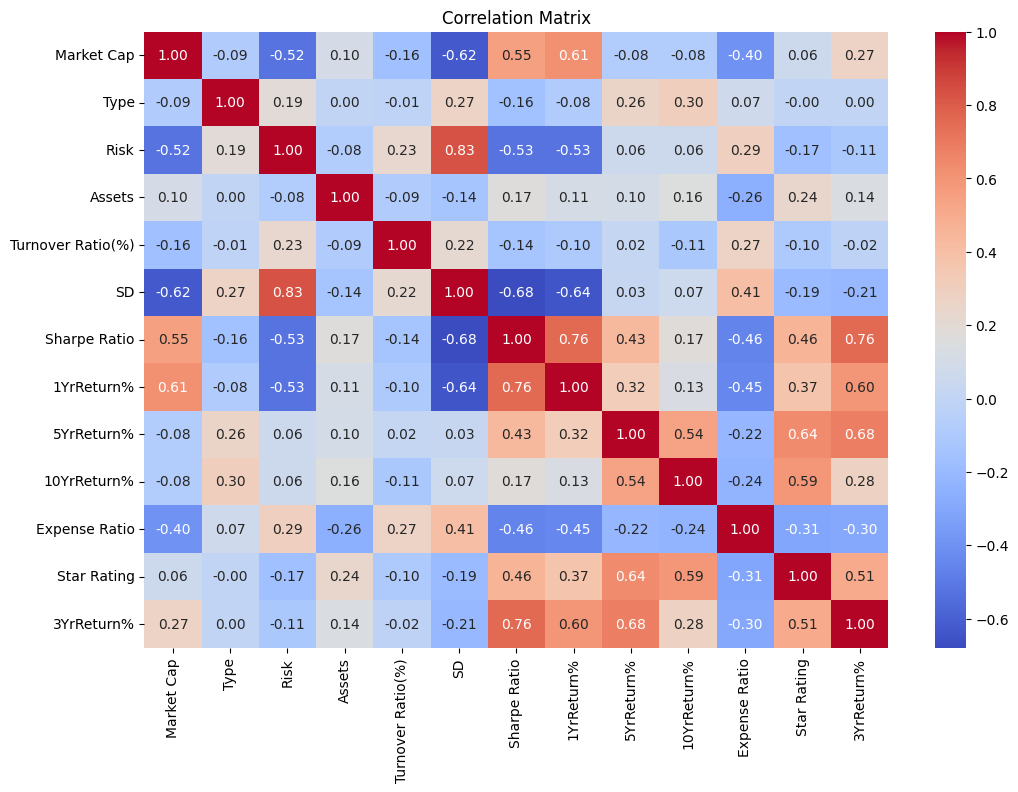

In [60]:

corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [63]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:12],df.iloc[:,-1],test_size=0.2)

In [45]:
y_train

,3YrReturn%
273,13.58
360,12.17
249,19.25
197,14.03
126,17.28
...,...
313,18.89
27,19.36
193,15.30
184,14.69


In [65]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}


In [67]:
results = []

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({"Model": name, "RMSE": rmse, "MAE": mae, "R2 Score": r2})

results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)
print(results_df)


                      Model      RMSE       MAE  R2 Score
1             Random Forest  1.062594  0.726768  0.855049
2         Gradient Boosting  1.165823  0.777794  0.825518
0         Linear Regression  1.235821  0.661866  0.803936
3             Decision Tree  1.481829  0.969390  0.718108
4  Support Vector Regressor  2.700949  2.136506  0.063476


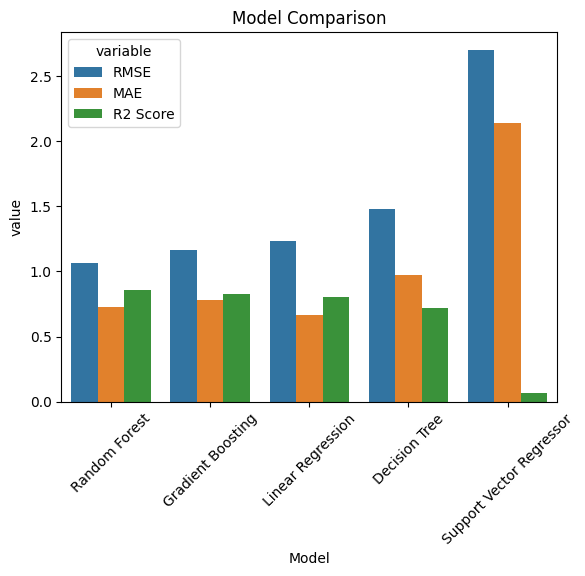

In [68]:
sns.barplot(data=results_df.melt(id_vars="Model", value_vars=["RMSE", "MAE", "R2 Score"]),
            x="Model", y="value", hue="variable")
plt.xticks(rotation=45)
plt.title("Model Comparison")
plt.show()


In [46]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [47]:
y_pred = model.predict(x_test)

In [49]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test,y_pred)

In [50]:
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.8084
Root Mean Squared Error (RMSE): 1.2518
R^2 Score: 0.8569


In [ ]:
import joblib
joblib.dump(model,'model.pkl')

['model.pkl']